# Worksheet 02

Name:   Ria Singh
UID:    U21576658

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

In a top-down approach, the development starts with the design of the high-level functions without immediately implementing the lower-level details. This means that fully functional prototypes might not be available until much later in the development process. Without these prototypes, it can be challenging to conduct early-stage testing, especially for lower-level components that depend on the completion of higher-level modules.

b) What is a drawback of the bottom up approach?

A drawback of the bottom-up approach is that it can lead to integration challenges and difficulties in understanding the overall system architecture, as the focus is initially on developing individual components without a clear view of how they fit into the larger system.

c) What are 3 things you can do to have a better debugging experience?

To have a better debugging experience, consider implementing the following three practices:

1. Use Version Control
2. Write Unit Tests
3. Sanity checks

d) (Optional) Follow along with the live coding. You can write your code here:

## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [14]:
import pandas as pd

df = pd.read_csv('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [15]:
print("there are "+str(df.isnull().any(axis=1).sum())+" rows with at least one empty value")

there are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [16]:
df.drop(columns=df.columns.values[df.isnull().sum()>200], inplace=True)
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


d) Complete the code below to replaces `male` with 0 and `female` with 1

In [17]:
df['Sex']=df['Sex'].replace({'male':0,'female':1})
df.head()

/var/folders/cf/px63zt_d3b9_vzhzxnr4m8240000gn/T/ipykernel_26357/2504517515.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex']=df['Sex'].replace({'male':0,'female':1})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [18]:
df[['Last Name','Title','First Name','Middle Name']]=df['Name'].str.extract(r'([^,]+), (\w+)\. ([^ ]+) ?([^ ]+)?')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry


f) Complete the code below to replace all missing ages with the average age

In [19]:
avg_age=df['Age'].mean()
df['Age']=df['Age'].fillna(avg_age)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

In [20]:
# %pip install matplotlib 
# %pip install seaborn

Text(0, 0.5, 'Average Age')

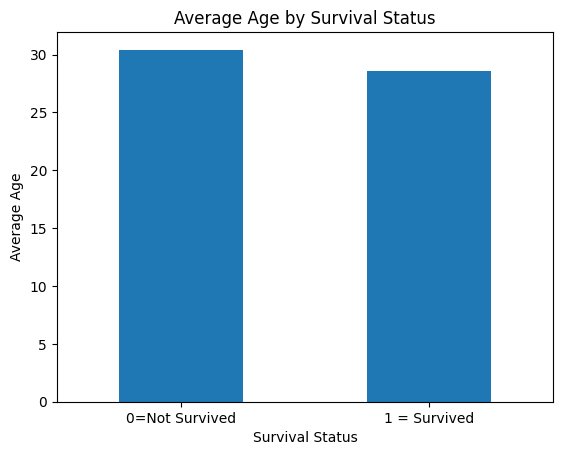

In [21]:
average_age_by_survival=df.groupby('Survived')['Age'].mean()
average_age_by_survival.index=['0=Not Survived','1 = Survived']
ax=average_age_by_survival.plot.bar(title='Average Age by Survival Status', rot=0)
ax.set_xlabel('Survival Status')
ax.set_ylabel('Average Age')


The slight difference in mean ages between survivors and non-survivors may be influenced by imputing missing ages with the overall mean age, potentially skewing the data if missing values are unevenly distributed between these groups. Thus no definite correlation can be reported.

In [22]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame
# # Example data loading step
# # df = pd.read_csv('your_dataset.csv')

# # Convert 'Survived' to a categorical type for better plot labeling
# df['Survived'] = df['Survived'].map({0: 'Did Not Survive', 1: 'Survived'})

# # Create a box plot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Survived', y='Age', data=df)

# plt.title('Age Distribution by Survival Status')
# plt.xlabel('Survival Status')
# plt.ylabel('Age')
# plt.show()
